In [ ]:
BadEnvironmentSatisfaction = employee_survey[employee_survey['EnvironmentSatisfaction']<2.1].count()
print(BadEnvironmentSatisfaction['EnvironmentSatisfaction'] / nbEmploye * 100)
BadEnvironmentSatisfaction


On fait la même chose pour la satisfaction sur leurs travail et on obtient des résultats similaires, ce qui confirme les boîtes a moustache

In [ ]:
BadJobSatisfaction = employee_survey[employee_survey['JobSatisfaction']<2.1].count()
print(BadJobSatisfaction['JobSatisfaction'] / nbEmploye * 100)
BadJobSatisfaction

Enfin on regarde l'équilibre entre la vie privée et professionelle, dans ce cas on obtient 28.5% des employés

In [ ]:
BadWorkLifeBalance = employee_survey[employee_survey['WorkLifeBalance']<2.1].count()
print(BadWorkLifeBalance['WorkLifeBalance'] / nbEmploye * 100)
BadWorkLifeBalance

Si on essaie de regarder les employés qui ont a la foie une balance mauvaise, et une satisfaction de leur travail et de leur environnement de travail faible on obtient 178 personne avec une très mauvaise expérience

In [ ]:
BadEnvironmentSatisfaction = employee_survey[employee_survey['EnvironmentSatisfaction']<2.1]
BadSatisfaction = BadEnvironmentSatisfaction[BadEnvironmentSatisfaction['JobSatisfaction']<2.1]
BadAll = BadSatisfaction[BadSatisfaction['WorkLifeBalance']<2.1]
BadAll["EmployeeID"].count()

# General
<div id="ge"></div>

## Données contenue dans le set

In [ ]:
general.head()

## Analyse des données vides

In [ ]:
general.isnull().sum()

## Modifications nécéssaires

### Variables discrètes hierarchiques

Ensuite, on remplace les valeurs dans "BusinessTravel" avec l'"OrdinalEncoder" car il y a un ordre hiérarchique entre les données

In [ ]:
ord_enc = OrdinalEncoder(categories=[['Non-Travel','Travel_Rarely','Travel_Frequently']])
encoded = ord_enc.fit_transform(general[["BusinessTravel"]])
general.drop('BusinessTravel', axis=1)
general = general.assign(BusinessTravel = encoded) 

In [ ]:
ord_enc = OrdinalEncoder(categories=[['No','Yes']])
encoded = ord_enc.fit_transform(general[["Attrition"]])
general.drop('Attrition', axis=1)
general = general.assign(Attrition = encoded) 

In [ ]:
import sklearn
import warnings
import statistics
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from mlxtend.plotting import plot_decision_regions
from mlxtend.classifier import EnsembleVoteClassifier
import matplotlib.gridspec as gridspec
import itertools
from sklearn.svm import SVC
from statistics import median, mean
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split,cross_val_score, cross_validate, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier,RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, roc_auc_score, make_scorer

In [ ]:
dir = "data/"

employee_survey = pd.read_csv(dir + "employee_survey_data.csv")
general = pd.read_csv(dir + "general_data.csv")
manager_survey = pd.read_csv(dir + "manager_survey_data.csv")
in_time = pd.read_csv(dir + "in_time.csv")
out_time = pd.read_csv(dir + "out_time.csv")

# Sommaire

<ul>
    <li><a href="#es">Employe survey</a></li>
    <li><a href="#ge">General</a></li>
    <li><a href="#ms">Manager survey</a></li>
    <li><a href="#it">In Time</a></li>
    <li><a href="#ot">Out Time</a></li>
    <li><a href="#ld">Lien entre les dataset</a></li>
    <li><a href="#cc">Conclusion</a></li>
</ul>

# Définition des variables globales

In [ ]:
nbEmploye = employee_survey["EmployeeID"].max()
print("Il y a", nbEmploye, "employés dans le dataset")

# Employee survey
<div id="es"></div>

## Données contenues dans le set

In [ ]:
employee_survey.head()

## Anaylse des données vides

In [ ]:
employee_survey.isnull().sum()

## Répartition des notes

In [ ]:
employee_survey_anonyme = employee_survey.drop(["EmployeeID"], axis=1, inplace=False)
sns.boxplot(data=employee_survey_anonyme)


In [ ]:
sns.histplot(data=employee_survey_anonyme, kde=True)

## Tendance des mauvais résultats

On regarde tout d'abord le nombre de gens qui sont insatisfait le l'environnement de travail et on remarque qu'ils représentent 38,5% des employés

On fait la même chose pour la satisfaction sur leurs travail et on obtient des résultats similaires, ce qui confirme les boîtes a moustache

Enfin on regarde l'équilibre entre la vie privée et professionelle, dans ce cas on obtient 28.5% des employés

Si on essaie de regarder les employés qui ont a la foie une balance mauvaise, et une satisfaction de leur travail et de leur environnement de travail faible on obtient 178 personne avec une très mauvaise expérience

# General
<div id="ge"></div>

In [ ]:
general.head()

In [ ]:
general.isnull().sum()

### Variables discrètes hierarchiques

Ensuite, on remplace les valeurs dans "BusinessTravel" avec l'"OrdinalEncoder" car il y a un ordre hiérarchique entre les données

In [ ]:
ord_enc = OrdinalEncoder(categories=[['No','Yes']])
encoded = ord_enc.fit_transform(general[["Attrition"]])
general.drop('Attrition', axis=1)
general = general.assign(Attrition = encoded) 

### Variables discrètes indépendantes
Ensuite on remplace les valeurs dans "Department" avec le "OneHotEncoder" car il n'y a pas de hiérarchie entre les valeurs

In [ ]:
one_enc = OneHotEncoder()
encoded = one_enc.fit_transform(general[['EducationField']])
edu_enc = pd.DataFrame(encoded.toarray())
edu_enc = edu_enc.rename(columns={
    0:'Education_Human Resources', 
    1:'Education_Life Sciences', 
    2:'Education_Marketing', 
    3:'Education_Medical', 
    4:'Education_Other', 
    5:'Education_Technical Degreee'})
general.drop('EducationField', axis=1, inplace=True)
general = pd.concat([general, edu_enc], axis=1)

In [ ]:
one_enc = OneHotEncoder()
encoded = one_enc.fit_transform(general[['JobRole']])
job_enc = pd.DataFrame(encoded.toarray())
job_enc = job_enc.rename(columns={
    0:'Job_Healthcare Representative', 
    1:'Job_Human Resources', 
    2:'Job_Laboratory Technician', 
    3:'Job_Manager', 
    4:'Job_Manufacturing Director',
    5:'Job_Research Director',
    6:'Job_Research Scientist',
    7:'Job_Sales Executive',
    8:'Job_Sales Representative'})
general.drop('JobRole', axis=1, inplace=True)
general = pd.concat([general, job_enc], axis=1)

La classe globale encoder fait strictement la même chose que les cellules précédentes a ceci près qu'elle peu être intégré au pipeline

In [141]:
general

,Age,Attrition,BusinessTravel,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,...,Job_Laboratory Technician,Job_Manager,Job_Manufacturing Director,Job_Research Director,Job_Research Scientist,Job_Sales Executive,Job_Sales Representative,Divorced,Married,Single
0,51,0.0,1.0,6,2,1,1,1,131160,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,31,1.0,2.0,10,1,1,2,1,41890,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,32,0.0,2.0,17,4,1,3,4,193280,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,38,0.0,0.0,2,5,1,4,3,83210,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,32,0.0,1.0,10,1,1,5,1,23420,4.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,0.0,1.0,5,4,1,4406,1,60290,3.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4406,29,0.0,1.0,2,4,1,4407,1,26790,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4407,25,0.0,1.0,25,2,1,4408,2,37020,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4408,42,0.0,1.0,18,2,1,4409,1,23980,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Nombres de personnes qui ont quitté l'entreprise en 2016

### Heatmap

<Axes: >

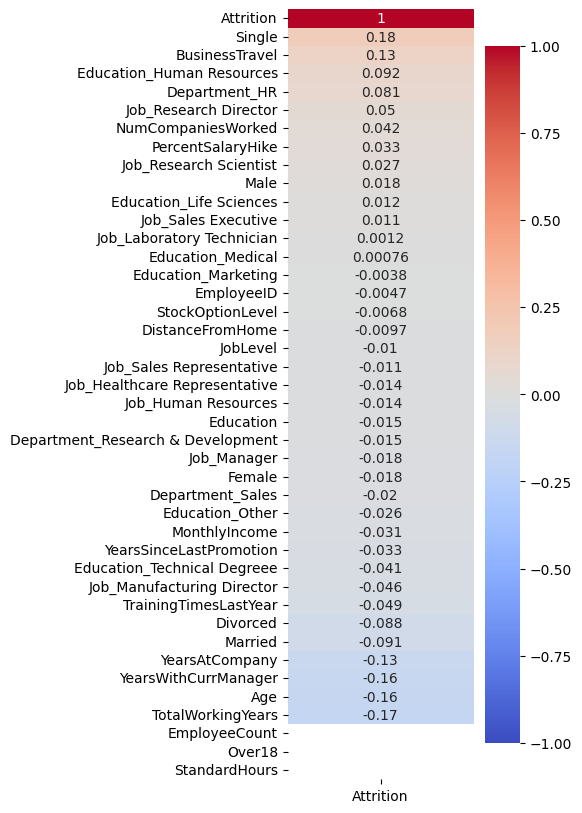

In [143]:
plt.figure(figsize=(3, 10))
general_corr = general.corr()
sns.heatmap(general_corr[['Attrition']].sort_values(by=['Attrition'],ascending=False), vmin=-1, vmax=1, annot=True, cmap='coolwarm')

### Histogrammes

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'DistanceFromHome'}>,
        <Axes: title={'center': 'Education'}>],
       [<Axes: title={'center': 'JobLevel'}>,
        <Axes: title={'center': 'MonthlyIncome'}>,
        <Axes: title={'center': 'NumCompaniesWorked'}>],
       [<Axes: title={'center': 'PercentSalaryHike'}>,
        <Axes: title={'center': 'TotalWorkingYears'}>,
        <Axes: title={'center': 'TrainingTimesLastYear'}>],
       [<Axes: title={'center': 'YearsAtCompany'}>,
        <Axes: title={'center': 'YearsSinceLastPromotion'}>,
        <Axes: title={'center': 'YearsWithCurrManager'}>]], dtype=object)

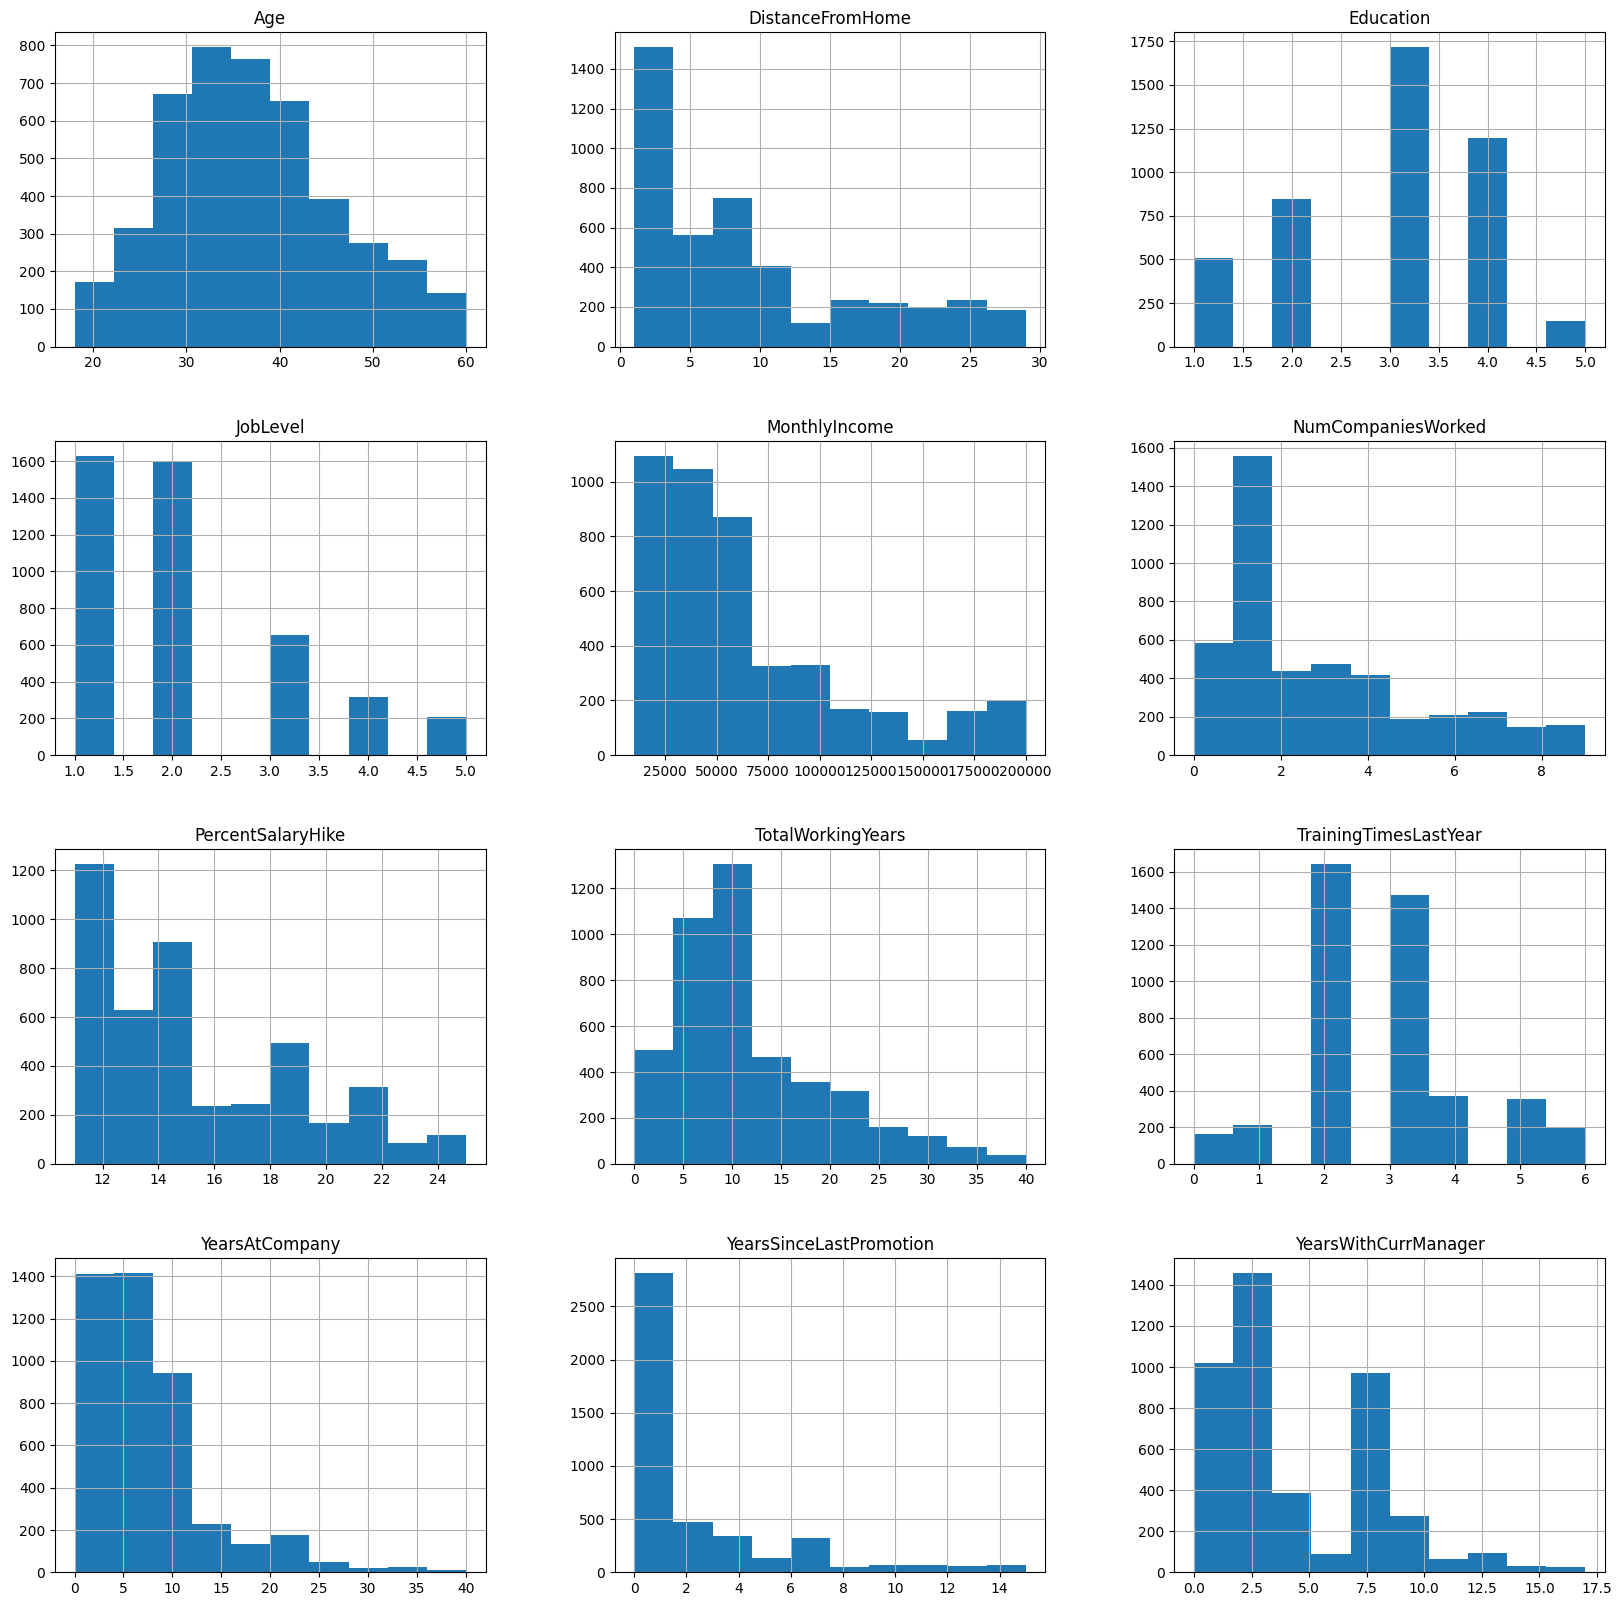

In [144]:
general.filter(items= ["Age","DistanceFromHome","Education","JobLevel", "MonthlyIncome", "NumCompaniesWorked", "PercentSalaryHike", "TotalWorkingYears", "TrainingTimesLastYear", "YearsAtCompany", "YearsSinceLastPromotion", "YearsWithCurrManager"]).hist(figsize=(20,20))

# Manager survey
<div id="ms"></div>

## Données contenue dans le set

In [145]:
manager_survey.head()

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


## Analyse des données vides

In [146]:
manager_survey.isnull().sum()

EmployeeID           0
JobInvolvement       0
PerformanceRating    0
dtype: int64

## Analyse générale

<Axes: >

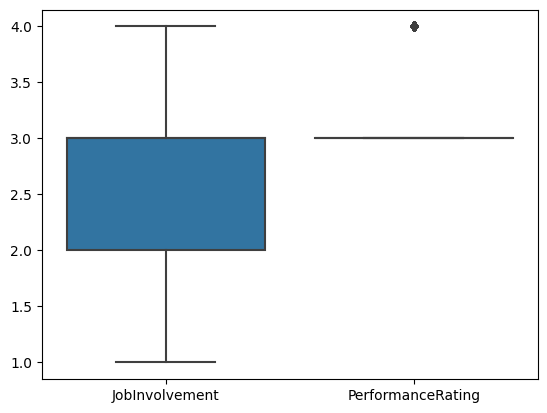

In [147]:
manager_survey_anonyme = manager_survey.drop(["EmployeeID"], axis=1, inplace=False)
sns.boxplot(data=manager_survey_anonyme)

#corréler avec attrition

# In Time
<div id="it"></div>

## Données contenues dans le dataset

In [148]:
in_time.head()

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,...,NaN,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,NaN,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44
1,2,NaN,2015-01-02 10:15:44,2015-01-05 10:21:05,NaN,2015-01-07 09:45:17,2015-01-08 10:09:04,2015-01-09 09:43:26,2015-01-12 10:00:07,2015-01-13 10:43:29,...,2015-12-18 10:37:17,2015-12-21 09:49:02,2015-12-22 10:33:51,2015-12-23 10:12:10,NaN,NaN,2015-12-28 09:31:45,2015-12-29 09:55:49,2015-12-30 10:32:25,2015-12-31 09:27:20
2,3,NaN,2015-01-02 10:17:41,2015-01-05 09:50:50,2015-01-06 10:14:13,2015-01-07 09:47:27,2015-01-08 10:03:40,2015-01-09 10:05:49,2015-01-12 10:03:47,2015-01-13 10:21:26,...,2015-12-18 10:15:14,2015-12-21 10:10:28,2015-12-22 09:44:44,2015-12-23 10:15:54,2015-12-24 10:07:26,NaN,2015-12-28 09:42:05,2015-12-29 09:43:36,2015-12-30 09:34:05,2015-12-31 10:28:39
3,4,NaN,2015-01-02 10:05:06,2015-01-05 09:56:32,2015-01-06 10:11:07,2015-01-07 09:37:30,2015-01-08 10:02:08,2015-01-09 10:08:12,2015-01-12 10:13:42,2015-01-13 09:53:22,...,2015-12-18 10:17:38,2015-12-21 09:58:21,2015-12-22 10:04:25,2015-12-23 10:11:46,2015-12-24 09:43:15,NaN,2015-12-28 09:52:44,2015-12-29 09:33:16,2015-12-30 10:18:12,2015-12-31 10:01:15
4,5,NaN,2015-01-02 10:28:17,2015-01-05 09:49:58,2015-01-06 09:45:28,2015-01-07 09:49:37,2015-01-08 10:19:44,2015-01-09 10:00:50,2015-01-12 10:29:27,2015-01-13 09:59:32,...,2015-12-18 09:58:35,2015-12-21 10:03:41,2015-12-22 10:10:30,2015-12-23 10:13:36,2015-12-24 09:44:24,NaN,2015-12-28 10:05:15,2015-12-29 10:30:53,2015-12-30 09:18:21,2015-12-31 09:41:09


## Analyse des données vides

In [149]:
print("Par date")
print(in_time.isnull().sum())
print("Par employé")
print(in_time.isnull().sum(axis=1))

Par date
Unnamed: 0       0
2015-01-01    4410
2015-01-02     209
2015-01-05     206
2015-01-06     228
              ... 
2015-12-25    4410
2015-12-28     234
2015-12-29     230
2015-12-30     265
2015-12-31     213
Length: 262, dtype: int64
Par employé
0       29
1       25
2       19
3       26
4       16
        ..
4405    18
4406    20
4407    30
4408    20
4409    29
Length: 4410, dtype: int64


## Répartition des données

<Axes: >

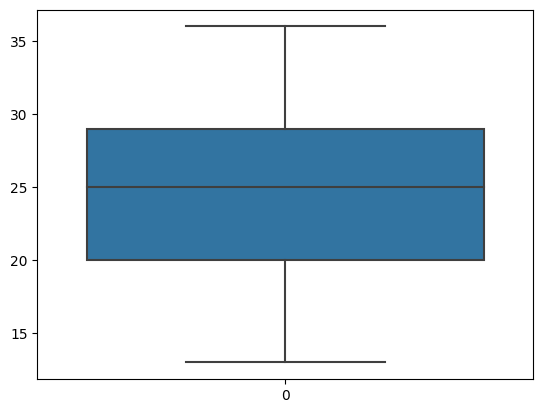

In [150]:

sns.boxplot(in_time.isnull().sum(axis=1))

# Out Time
<div id="ot"></div>

## Données contenues dans le set

In [151]:
out_time.head()

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,...,NaN,2015-12-21 17:15:50,2015-12-22 17:27:51,2015-12-23 16:44:44,2015-12-24 17:47:22,NaN,2015-12-28 18:00:07,2015-12-29 17:22:30,2015-12-30 17:40:56,2015-12-31 17:17:33
1,2,NaN,2015-01-02 18:22:17,2015-01-05 17:48:22,NaN,2015-01-07 17:09:06,2015-01-08 17:34:04,2015-01-09 16:52:29,2015-01-12 17:36:48,2015-01-13 18:00:13,...,2015-12-18 18:31:28,2015-12-21 17:34:16,2015-12-22 18:16:35,2015-12-23 17:38:18,NaN,NaN,2015-12-28 17:08:38,2015-12-29 17:54:46,2015-12-30 18:31:35,2015-12-31 17:40:58
2,3,NaN,2015-01-02 16:59:14,2015-01-05 17:06:46,2015-01-06 16:38:32,2015-01-07 16:33:21,2015-01-08 17:24:22,2015-01-09 16:57:30,2015-01-12 17:28:54,2015-01-13 17:21:25,...,2015-12-18 17:02:23,2015-12-21 17:20:17,2015-12-22 16:32:50,2015-12-23 16:59:43,2015-12-24 16:58:25,NaN,2015-12-28 16:43:31,2015-12-29 17:09:56,2015-12-30 17:06:25,2015-12-31 17:15:50
3,4,NaN,2015-01-02 17:25:24,2015-01-05 17:14:03,2015-01-06 17:07:42,2015-01-07 16:32:40,2015-01-08 16:53:11,2015-01-09 17:19:47,2015-01-12 17:13:37,2015-01-13 17:11:45,...,2015-12-18 17:55:23,2015-12-21 16:49:09,2015-12-22 17:24:00,2015-12-23 17:36:35,2015-12-24 16:48:21,NaN,2015-12-28 17:19:34,2015-12-29 16:58:16,2015-12-30 17:40:11,2015-12-31 17:09:14
4,5,NaN,2015-01-02 18:31:37,2015-01-05 17:49:15,2015-01-06 17:26:25,2015-01-07 17:37:59,2015-01-08 17:59:28,2015-01-09 17:44:08,2015-01-12 18:51:21,2015-01-13 18:14:58,...,2015-12-18 17:52:48,2015-12-21 17:43:35,2015-12-22 18:07:57,2015-12-23 18:00:49,2015-12-24 17:59:22,NaN,2015-12-28 17:44:59,2015-12-29 18:47:00,2015-12-30 17:15:33,2015-12-31 17:42:14


## Analyse des données vides

In [152]:
print("Par date")
print(out_time.isnull().sum())
print("Par employé")
print(out_time.isnull().sum(axis=1))


Par date
Unnamed: 0       0
2015-01-01    4410
2015-01-02     209
2015-01-05     206
2015-01-06     228
              ... 
2015-12-25    4410
2015-12-28     234
2015-12-29     230
2015-12-30     265
2015-12-31     213
Length: 262, dtype: int64
Par employé
0       29
1       25
2       19
3       26
4       16
        ..
4405    18
4406    20
4407    30
4408    20
4409    29
Length: 4410, dtype: int64


## Répartition des données

<Axes: >

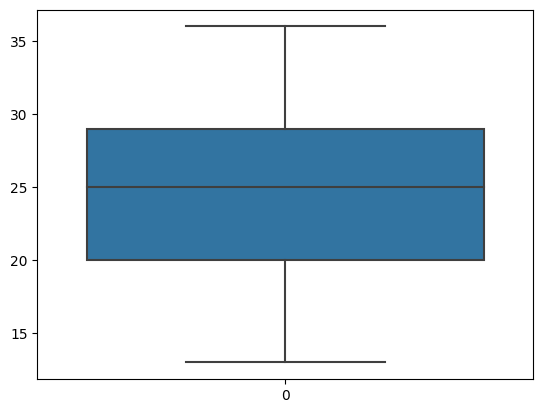

In [153]:

sns.boxplot(in_time.isnull().sum(axis=1))

# Lien entre des datasets
<div id="ld"></div>

## Données générales

### Base du temps

In [154]:
dayOff = in_time.isnull().sum() == 4410
print("Il y a", dayOff.sum() ,"jours de congés" )

Il y a 12 jours de congés


<Axes: >

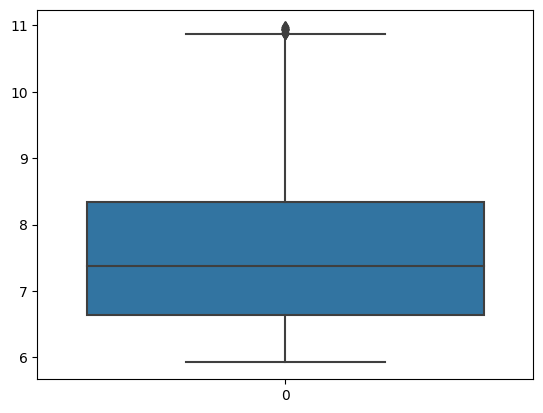

In [155]:
# average of the number of hours worked per day
in_time = in_time.dropna(axis=1, how='all')
out_time = out_time.dropna(axis=1, how='all')
in_time = in_time.dropna(axis=0, how='all')
out_time = out_time.dropna(axis=0, how='all')
in_time = in_time.apply(pd.to_datetime)
out_time = out_time.apply(pd.to_datetime)
hours_worked = out_time - in_time
hours_worked = hours_worked.applymap(lambda x: x.total_seconds() / 3600)
hours_worked = hours_worked.mean(axis=1)
hours_worked = hours_worked.dropna()
hours_worked = hours_worked.reset_index(drop=True)
sns.boxplot(hours_worked)



In [156]:
hours_worked_df = pd.DataFrame({
    "EmployeeID": general["EmployeeID"],
    "avg_hours_worked": hours_worked })
hours_worked_df

,EmployeeID,avg_hours_worked
0,1,7.342004
1,2,7.686399
2,3,6.984379
3,4,7.163197
4,5,7.973629
...,...,...
4405,4406,8.487350
4406,4407,6.067777
4407,4408,7.673414
4408,4409,9.453369


On remarque un taux plus élevé de démissions chez les gens qui travaillent le plus

<Axes: xlabel='avg_hours_worked', ylabel='Count'>

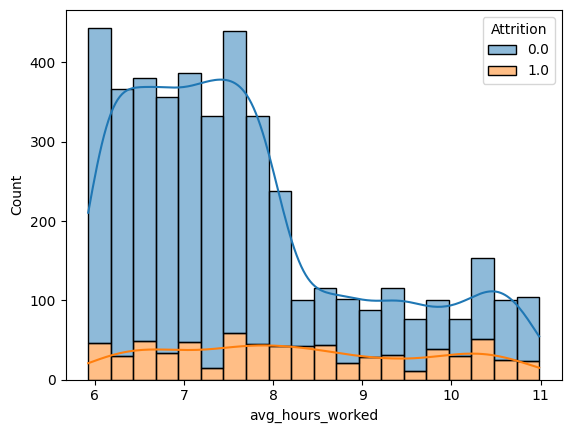

In [157]:
general_time = general.merge(hours_worked_df, on="EmployeeID")

sns.histplot(data=general_time, x="avg_hours_worked", hue="Attrition", multiple="stack", bins=20, kde=True)

In [158]:
general_badAll = general_time.merge(BadAll, on="EmployeeID", copy=True)

(general_badAll["Attrition"] == 0).sum()

133

In [159]:
out_timeAverage = out_time[out_time.columns[1:]].apply(pd.to_datetime)
out_timeAverage = out_timeAverage.apply(lambda x: (x - x.dt.normalize()).dt.total_seconds() / 3600)
out_timeAverage  = out_timeAverage.mean(axis=1)
out_timeAverage = out_timeAverage.to_frame()
out_timeAverage = out_timeAverage.assign(EmployeeID=range(1, len(out_timeAverage)+1))
out_timeAverage = out_timeAverage.rename(columns={0: 'avg_out_time'})

In [160]:
in_timeAverage = in_time[in_time.columns[1:]].apply(pd.to_datetime)
in_timeAverage = in_timeAverage.apply(lambda x: (x - x.dt.normalize()).dt.total_seconds() / 3600)
in_timeAverage = in_timeAverage.mean(axis=1)
in_timeAverage = in_timeAverage.to_frame()
in_timeAverage = in_timeAverage.assign(EmployeeID=range(1, len(in_timeAverage)+1))
in_timeAverage = in_timeAverage.rename(columns={0:'AverageStartTime'})

In [210]:
all_data = general.merge(manager_survey, on="EmployeeID", copy=True)
all_data = all_data.merge(employee_survey, on="EmployeeID", copy=True)
all_data = all_data.merge(hours_worked_df, on="EmployeeID", copy=True)
all_data = all_data.merge(out_timeAverage, on="EmployeeID", copy=True)
all_data = all_data.merge(in_timeAverage, on="EmployeeID", copy=True)

In [162]:
print(all_data["EmployeeID"].unique())
print(all_data["Over18"].unique())
print(all_data["StandardHours"].unique())

[   1    2    3 ... 4408 4409 4410]
[1.]
[8]


In [211]:
def dataCleaning(all_data, type):
    if type == 1:
        # drop useless columns
        all_data.drop("EmployeeID", axis=1, inplace=True)
        all_data.drop("Over18", axis=1, inplace=True)
        all_data.drop("EmployeeCount", axis=1, inplace=True)
        all_data.drop("StandardHours", axis=1, inplace=True)

    if type == 2:
        # drop unethical columns
        all_data.drop("Male", axis=1, inplace=True)
        all_data.drop("Female", axis=1, inplace=True)
        all_data.drop("Single", axis=1, inplace=True)
        all_data.drop("Married", axis=1, inplace=True)
        all_data.drop("Divorced", axis=1, inplace=True)
        all_data.drop("Age", axis=1, inplace=True)

    return all_data

all_data = dataCleaning(all_data,1)

<Axes: >

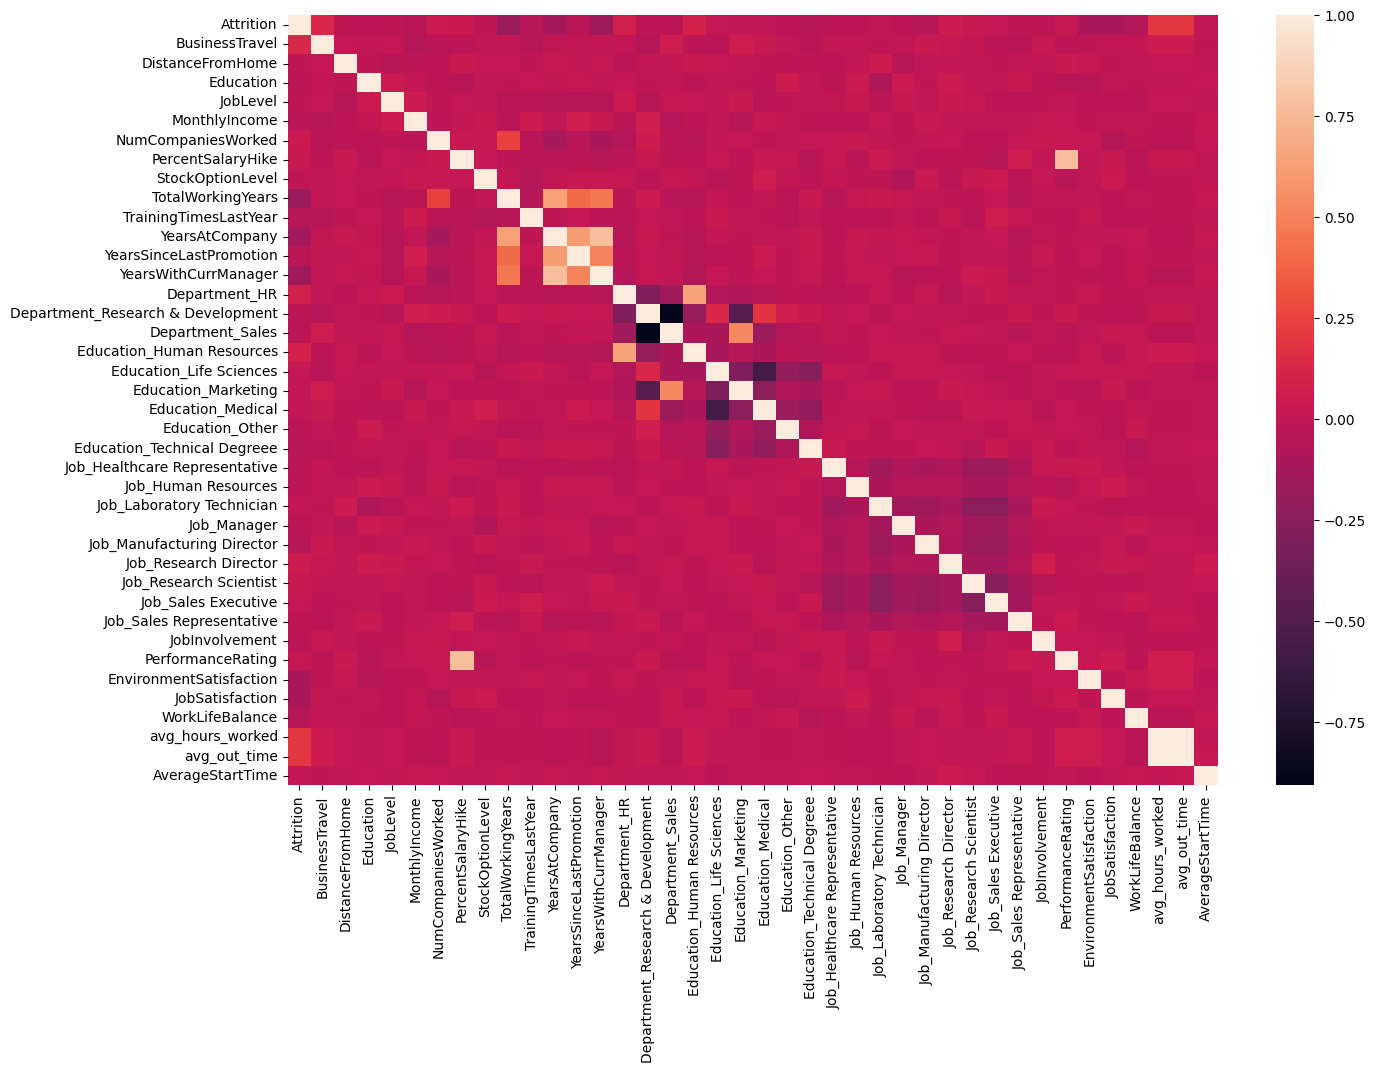

In [164]:
plt.figure(figsize=(15, 10))
sns.heatmap(all_data.corr(numeric_only=True))

<Axes: >

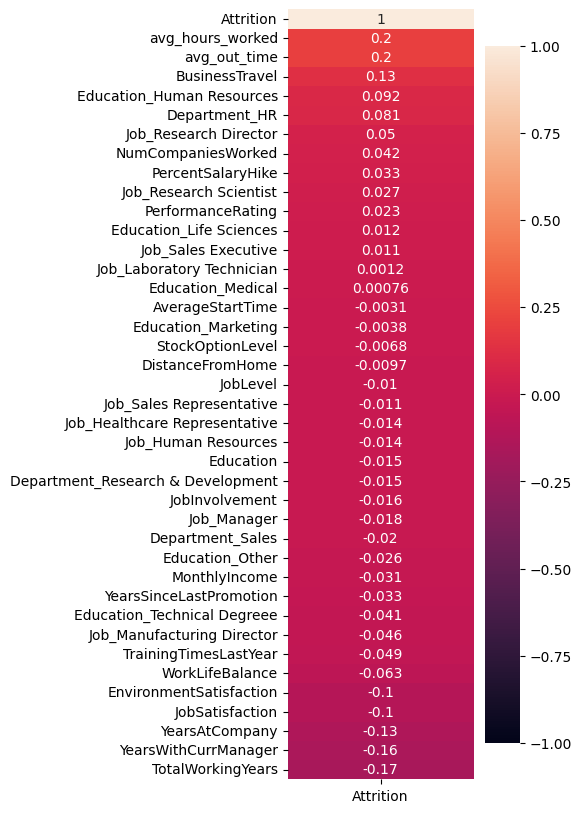

In [165]:
plt.figure(figsize=(3, 10))
all_data_corr = all_data.corr()
sns.heatmap(all_data_corr[['Attrition']].sort_values(by=['Attrition'],ascending=False), vmin=-1, vmax=1, annot=True)

Lien entre age et temps travaillé

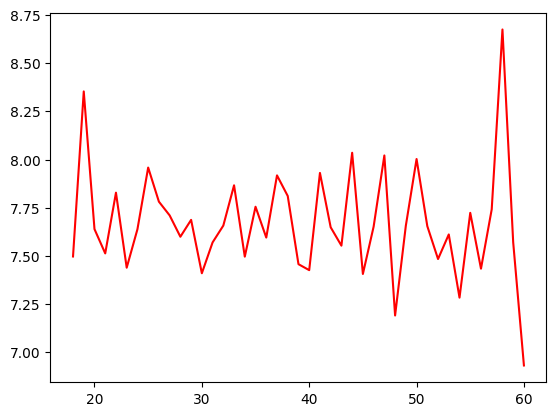

In [206]:
age_hours_worked = all_data.groupby(['Age'])["avg_hours_worked"].mean()
plt.plot(age_hours_worked.index, age_hours_worked.values, color="red")

In [212]:
all_data = dataCleaning(all_data,2)

# Gestion des valeurs manquantes

In [168]:
def nullToMedian(all_data):
    all_data["NumCompaniesWorked"] = all_data["NumCompaniesWorked"].replace(np.nan,median(all_data["NumCompaniesWorked"]))
    all_data["TotalWorkingYears"] = all_data["TotalWorkingYears"].replace(np.nan,median(all_data["TotalWorkingYears"]))

    all_data["EnvironmentSatisfaction"] = all_data["EnvironmentSatisfaction"].replace(np.nan,median(all_data["EnvironmentSatisfaction"]))
    all_data["JobSatisfaction"] = all_data["JobSatisfaction"].replace(np.nan,median(all_data["JobSatisfaction"]))
    all_data["WorkLifeBalance"] = all_data["WorkLifeBalance"].replace(np.nan,median(all_data["WorkLifeBalance"]))
    return all_data

def nullToKnnImputer(all_data):
    imputer = KNNImputer(n_neighbors=5)
    all_data_imputed = pd.DataFrame(imputer.fit_transform(all_data), columns=all_data.columns)
    return all_data_imputed

all_data = nullToMedian(all_data)

## Choix des hyperparamètres

In [170]:
y = all_data["Attrition"]

X = all_data.drop(columns=["Attrition"])

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)

### DecisionTreeClassifier

Pour le DecisionTreeClassifier nous allons utiliser GridSearch afin de trouver les meilleurs hyperparamètres

In [219]:
pipeline_dtc = Pipeline(steps=[
    ('classifier', DecisionTreeClassifier())
])

In [172]:
criterion = ['gini', 'entropy']
max_depth = [16,18,20,21,22,23,24]
splitter = ['best','random']


parameters_dtc = dict(classifier__criterion=criterion,
                  classifier__max_depth=max_depth,
                  classifier__splitter=splitter)


In [173]:
f1 = make_scorer(f1_score , average='macro')
dtc_GS = GridSearchCV(pipeline_dtc, parameters_dtc, scoring=f1, cv=7)
dtc_GS.fit(x_train, y_train)

GridSearchCV(cv=7,
             estimator=Pipeline(steps=[('classifier',
                                        DecisionTreeClassifier())]),
             param_grid={'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_depth': [16, 18, 20, 21, 22, 23, 24],
                         'classifier__splitter': ['best', 'random']},
             scoring=make_scorer(f1_score, average=macro))

In [174]:
pd.DataFrame.from_dict(dtc_GS.cv_results_).sort_values(by=['rank_test_score']).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__criterion,param_classifier__max_depth,param_classifier__splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,mean_test_score,std_test_score,rank_test_score
19,0.011452,0.000556,0.002867,0.000520,entropy,20,random,"{'classifier__criterion': 'entropy', 'classifi...",0.957649,0.962090,0.948782,0.945597,0.989753,0.976307,0.962077,0.963179,0.014282,1
23,0.011797,0.000568,0.002991,0.000586,entropy,22,random,"{'classifier__criterion': 'entropy', 'classifi...",0.951525,0.945114,0.951525,0.972026,0.963427,0.962426,0.979599,0.960806,0.011383,2
3,0.012656,0.001027,0.002869,0.000694,gini,18,random,"{'classifier__criterion': 'gini', 'classifier_...",0.950590,0.945617,0.944599,0.941931,0.962426,0.966604,0.958821,0.952941,0.008954,3
25,0.013057,0.001085,0.003146,0.000875,entropy,23,random,"{'classifier__criterion': 'entropy', 'classifi...",0.948305,0.959213,0.952844,0.930725,0.969537,0.976089,0.933208,0.952846,0.015834,4
21,0.011879,0.000694,0.002797,0.000452,entropy,21,random,"{'classifier__criterion': 'entropy', 'classifi...",0.916170,0.948782,0.975648,0.934496,0.962426,0.955181,0.976089,0.952685,0.020198,5


Après plusieurs tests, on ressort qu'une max_depth de 22 et un criterion en entropy est le meilleur model que l'on peu avoir

In [175]:
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=20, splitter="random")
dtc.fit(x_train, y_train)

y_pred = dtc.predict(x_test)

In [228]:
dtc.feature_importances_

array([0.02707534, 0.05605092, 0.01911787, 0.06780737, 0.03759017,
       0.04537228, 0.01954732, 0.08441145, 0.03200035, 0.04957381,
       0.03746328, 0.05264436, 0.00943819, 0.00810716, 0.00966237,
       0.00413936, 0.01371846, 0.0060763 , 0.01109524, 0.00363008,
       0.00474967, 0.00708939, 0.00473306, 0.00769137, 0.00341927,
       0.00349855, 0.00497232, 0.00739256, 0.01464891, 0.00296574,
       0.01924696, 0.00856412, 0.03331076, 0.04601   , 0.03109232,
       0.09563102, 0.08428663, 0.02617567])

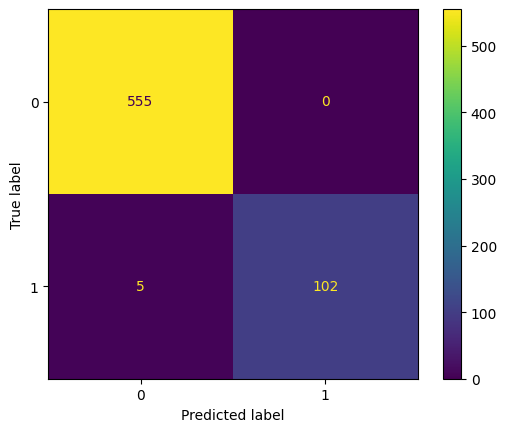

In [176]:
dtc_cm = confusion_matrix(y_test, y_pred)
dtc_cmd = ConfusionMatrixDisplay(confusion_matrix=dtc_cm,
                       display_labels=[0,1])

dtc_cmd.plot()
plt.show()


In [268]:


dtc = DecisionTreeClassifier(criterion='entropy', max_depth=20, splitter="random")

# Entraîner le modèle sur les données d'apprentissage
dtc.fit(x_train, y_train)

# Faire des prédictions sur les données de test
y_pred_dtc = dtc.predict(x_test)

In [178]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [179]:
print("Accuracy:", accuracy)
print("F1 score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("ROC AUC score:", roc_auc)

Accuracy: 0.9879154078549849
F1 score: 0.9622641509433962
Precision: 0.9714285714285714
Recall: 0.9532710280373832
ROC AUC score: 0.9739328113159889


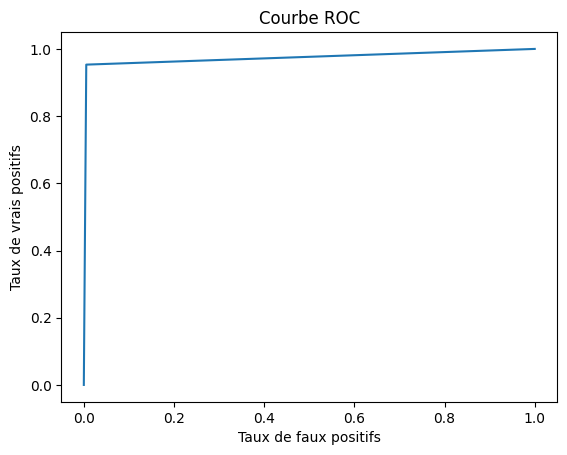

In [180]:
plt.plot(fpr, tpr)
plt.title('Courbe ROC')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.show()

### HistGradientBoostingClassifier

In [181]:
pipeline_hist_gradient_boosting_classifier = Pipeline(steps=[
    ('classifier', HistGradientBoostingClassifier())
])

In [182]:
learning_rate = [0.1,0.2]
max_depth = [10,15,20]
#loss = ['log_loss', 'auto', 'binary_crossentropy', 'categorical_crossentropy']
max_iter = [10,20,50,100]

parameters_hgbc = dict(classifier__learning_rate=learning_rate,
                  classifier__max_depth=max_depth,
                  #classifier__loss=loss,
                  classifier__max_iter=max_iter
                  )

In [183]:
hgbc_GS = GridSearchCV(pipeline_hist_gradient_boosting_classifier, parameters_hgbc)
hgbc_GS.fit(x_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('classifier',
                                        HistGradientBoostingClassifier())]),
             param_grid={'classifier__learning_rate': [0.1, 0.2],
                         'classifier__max_depth': [10, 15, 20],
                         'classifier__max_iter': [10, 20, 50, 100]})

In [184]:
pd.DataFrame.from_dict(hgbc_GS.cv_results_).sort_values(by=['rank_test_score']).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__learning_rate,param_classifier__max_depth,param_classifier__max_iter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
23,1.720116,0.053822,0.008321,0.000985,0.2,20,100,"{'classifier__learning_rate': 0.2, 'classifier...",0.998866,1.000000,1.0,1.000000,1.0,0.999773,0.000454,1
19,1.750702,0.085550,0.008321,0.001327,0.2,15,100,"{'classifier__learning_rate': 0.2, 'classifier...",0.998866,1.000000,1.0,0.998866,1.0,0.999546,0.000555,2
15,1.676529,0.086120,0.009130,0.001360,0.2,10,100,"{'classifier__learning_rate': 0.2, 'classifier...",0.997732,0.998866,1.0,0.998866,1.0,0.999093,0.000848,3
22,0.861481,0.038548,0.006719,0.001208,0.2,20,50,"{'classifier__learning_rate': 0.2, 'classifier...",0.995465,1.000000,1.0,0.998866,1.0,0.998866,0.001756,4
18,0.897356,0.034305,0.006324,0.000744,0.2,15,50,"{'classifier__learning_rate': 0.2, 'classifier...",0.995465,0.997732,1.0,0.998866,1.0,0.998413,0.001697,5


In [267]:
hgbc = HistGradientBoostingClassifier(learning_rate=0.2, max_depth=20, max_iter=100)
hgbc.fit(x_train, y_train)

y_pred_hgbc = hgbc.predict(x_test)

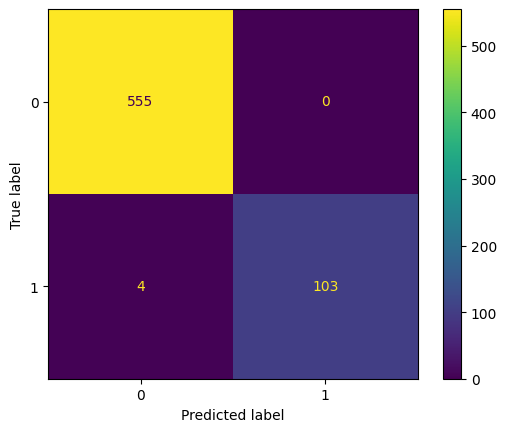

In [266]:
hgbc_cm = confusion_matrix(y_test, y_pred_hgbc)
hgbc_cmd = ConfusionMatrixDisplay(confusion_matrix=hgbc_cm,
                       display_labels=[0,1])

hgbc_cmd.plot()
plt.show()

### RandomForestClassifier

In [187]:
pipeline_random_forest_classifier = Pipeline(steps=[
    ('classifier', RandomForestClassifier())
])

In [264]:
n_estimators = [1,2,3,5,10]
criterion = ['gini', 'entropy']
max_depth = [10,14,18,22,24]


parameters_rfc = dict(classifier__n_estimators=n_estimators,
                  classifier__criterion=criterion,
                  classifier__max_depth=max_depth
                  )

In [265]:
rfc_GS = GridSearchCV(pipeline_random_forest_classifier, parameters_rfc)
rfc_GS.fit(x_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('classifier',
                                        RandomForestClassifier())]),
             param_grid={'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_depth': [10, 14, 18, 22, 24],
                         'classifier__n_estimators': [1, 2, 3, 5, 10]})

In [190]:
pd.DataFrame.from_dict(rfc_GS.cv_results_).sort_values(by=['rank_test_score']).head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__criterion,param_classifier__max_depth,param_classifier__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
19,0.072826,0.003257,0.005486,0.001131,gini,22,10,"{'classifier__criterion': 'gini', 'classifier_...",0.989796,0.992063,0.995465,0.995465,0.985261,0.991610,0.003835,1
39,0.080743,0.002809,0.004523,0.000604,entropy,18,10,"{'classifier__criterion': 'entropy', 'classifi...",0.987528,0.992063,0.993197,0.992063,0.990930,0.991156,0.001951,2
49,0.085903,0.005696,0.004412,0.000596,entropy,24,10,"{'classifier__criterion': 'entropy', 'classifi...",0.993197,0.988662,0.990930,0.988662,0.994331,0.991156,0.002312,3
24,0.072707,0.003113,0.004518,0.000559,gini,24,10,"{'classifier__criterion': 'gini', 'classifier_...",0.990930,0.980726,0.993197,0.993197,0.995465,0.990703,0.005191,4
14,0.071518,0.003709,0.004719,0.000509,gini,18,10,"{'classifier__criterion': 'gini', 'classifier_...",0.988662,0.987528,0.993197,0.988662,0.990930,0.989796,0.002028,5
44,0.082946,0.003217,0.004754,0.000541,entropy,22,10,"{'classifier__criterion': 'entropy', 'classifi...",0.990930,0.984127,0.987528,0.989796,0.992063,0.988889,0.002814,6
18,0.038289,0.002647,0.003504,0.000447,gini,22,5,"{'classifier__criterion': 'gini', 'classifier_...",0.981859,0.986395,0.986395,0.989796,0.990930,0.987075,0.003175,7
13,0.040743,0.002646,0.003503,0.001190,gini,18,5,"{'classifier__criterion': 'gini', 'classifier_...",0.987528,0.989796,0.987528,0.990930,0.979592,0.987075,0.003967,8
43,0.047682,0.002364,0.003350,0.000612,entropy,22,5,"{'classifier__criterion': 'entropy', 'classifi...",0.989796,0.979592,0.986395,0.988662,0.989796,0.986848,0.003835,9
38,0.040203,0.001264,0.003310,0.000400,entropy,18,5,"{'classifier__criterion': 'entropy', 'classifi...",0.982993,0.987528,0.984127,0.990930,0.988662,0.986848,0.002922,9


In [255]:
rfc = RandomForestClassifier(n_estimators=10,criterion='entropy',max_depth=24)
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)

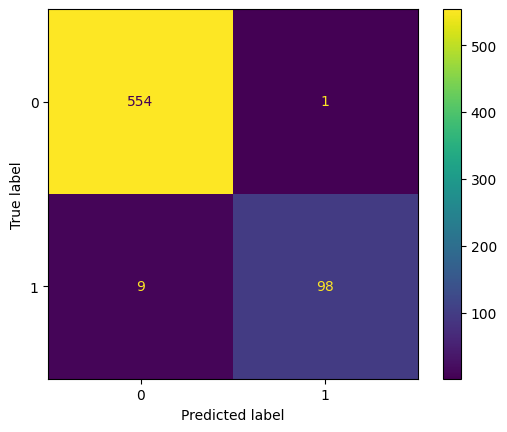

In [256]:
rfc_cm = confusion_matrix(y_test, y_pred)
rfc_cmd = ConfusionMatrixDisplay(confusion_matrix=rfc_cm,
                       display_labels=[0,1])

rfc_cmd.plot()
plt.show()

### Perceptron

In [193]:
pipeline_Perceptron = Pipeline(steps=[
    ('classifier', Perceptron())
])

In [194]:
penalty = ['l2','l1','elasticnet']
alpha = [0.0001,0.0002,0.0003]


parameters_pe = dict(classifier__penalty=penalty,
                  classifier__alpha=alpha)


In [195]:
pe_GS = GridSearchCV(pipeline_Perceptron, parameters_pe)
pe_GS.fit(x_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('classifier', Perceptron())]),
             param_grid={'classifier__alpha': [0.0001, 0.0002, 0.0003],
                         'classifier__penalty': ['l2', 'l1', 'elasticnet']})

In [196]:
pd.DataFrame.from_dict(pe_GS.cv_results_).sort_values(by=['rank_test_score'])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__alpha,param_classifier__penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008520,0.000559,0.002509,0.000449,0.0001,l2,"{'classifier__alpha': 0.0001, 'classifier__pen...",0.838667,0.838667,0.838667,0.839786,0.838451,0.838848,0.000477,1
1,0.010842,0.001204,0.002604,0.000495,0.0001,l1,"{'classifier__alpha': 0.0001, 'classifier__pen...",0.838667,0.838667,0.838667,0.839786,0.838451,0.838848,0.000477,1
2,0.010559,0.001322,0.002032,0.000064,0.0001,elasticnet,"{'classifier__alpha': 0.0001, 'classifier__pen...",0.838667,0.838667,0.838667,0.839786,0.838451,0.838848,0.000477,1
3,0.006745,0.001012,0.002107,0.000207,0.0002,l2,"{'classifier__alpha': 0.0002, 'classifier__pen...",0.838667,0.838667,0.838667,0.839786,0.838451,0.838848,0.000477,1
4,0.010344,0.001059,0.002766,0.000953,0.0002,l1,"{'classifier__alpha': 0.0002, 'classifier__pen...",0.838667,0.838667,0.838667,0.839786,0.838451,0.838848,0.000477,1
5,0.010929,0.000866,0.002620,0.000506,0.0002,elasticnet,"{'classifier__alpha': 0.0002, 'classifier__pen...",0.838667,0.838667,0.838667,0.839786,0.838451,0.838848,0.000477,1
6,0.006408,0.000380,0.002406,0.000376,0.0003,l2,"{'classifier__alpha': 0.0003, 'classifier__pen...",0.838667,0.838667,0.838667,0.839786,0.838451,0.838848,0.000477,1
7,0.011250,0.001367,0.002205,0.000398,0.0003,l1,"{'classifier__alpha': 0.0003, 'classifier__pen...",0.838667,0.838667,0.838667,0.839786,0.838451,0.838848,0.000477,1
8,0.011095,0.001738,0.002410,0.000378,0.0003,elasticnet,"{'classifier__alpha': 0.0003, 'classifier__pen...",0.838667,0.838667,0.838667,0.839786,0.838451,0.838848,0.000477,1


### Logistic Regression

In [197]:
pipeline_LogisticRegression = Pipeline(steps=[
    ('classifier', LogisticRegression())
])

In [198]:
penalty = ['l2']
max_iter = [200,300,400,500,600,700,800,900,1000]

parameters = dict(classifier__penalty = penalty, classifier__max_iter = max_iter)

In [199]:
lr_GS = GridSearchCV(pipeline_LogisticRegression, parameters)
lr_GS.fit(x_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('classifier', LogisticRegression())]),
             param_grid={'classifier__max_iter': [200, 300, 400, 500, 600, 700,
                                                  800, 900, 1000],
                         'classifier__penalty': ['l2']})

In [200]:
pd.DataFrame.from_dict(lr_GS.cv_results_).sort_values(by=['rank_test_score'])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__max_iter,param_classifier__penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.050387,0.015801,0.002202,0.000399,200,l2,"{'classifier__max_iter': 200, 'classifier__pen...",0.838667,0.845333,0.838667,0.839786,0.849132,0.842317,0.004209,1
1,0.052197,0.015364,0.002540,0.000613,300,l2,"{'classifier__max_iter': 300, 'classifier__pen...",0.838667,0.845333,0.838667,0.839786,0.849132,0.842317,0.004209,1
2,0.052818,0.019553,0.002308,0.000399,400,l2,"{'classifier__max_iter': 400, 'classifier__pen...",0.838667,0.845333,0.838667,0.839786,0.849132,0.842317,0.004209,1
3,0.049241,0.014707,0.001999,0.000003,500,l2,"{'classifier__max_iter': 500, 'classifier__pen...",0.838667,0.845333,0.838667,0.839786,0.849132,0.842317,0.004209,1
4,0.052510,0.017367,0.002305,0.000750,600,l2,"{'classifier__max_iter': 600, 'classifier__pen...",0.838667,0.845333,0.838667,0.839786,0.849132,0.842317,0.004209,1
5,0.052406,0.020547,0.002202,0.000400,700,l2,"{'classifier__max_iter': 700, 'classifier__pen...",0.838667,0.845333,0.838667,0.839786,0.849132,0.842317,0.004209,1
6,0.057335,0.019884,0.002399,0.000489,800,l2,"{'classifier__max_iter': 800, 'classifier__pen...",0.838667,0.845333,0.838667,0.839786,0.849132,0.842317,0.004209,1
7,0.052353,0.018169,0.002409,0.000378,900,l2,"{'classifier__max_iter': 900, 'classifier__pen...",0.838667,0.845333,0.838667,0.839786,0.849132,0.842317,0.004209,1
8,0.055371,0.016142,0.002605,0.000492,1000,l2,"{'classifier__max_iter': 1000, 'classifier__pe...",0.838667,0.845333,0.838667,0.839786,0.849132,0.842317,0.004209,1


In [214]:
lr = LogisticRegression(penalty='l2', max_iter=200)
lr.fit(x_test, y_test)

y_pred = lr.predict(x_test)

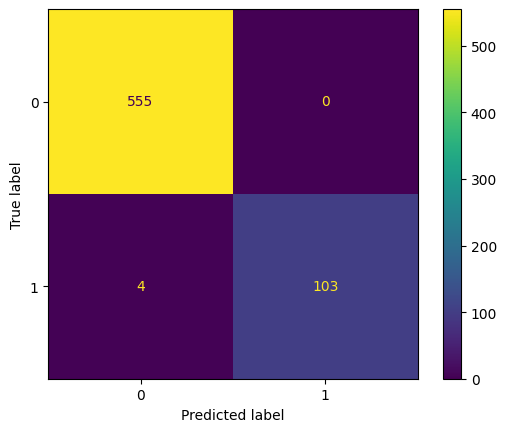

In [269]:
lr_cm = confusion_matrix(y_test, y_pred)
lr_cmd = ConfusionMatrixDisplay(confusion_matrix=lr_cm,
                       display_labels=[0,1])

lr_cmd.plot()
plt.show()

# Analyse des résultats

### Decsision Tree Classifier

In [253]:
feature_names = pipeline_dtc[:-1].get_feature_names_out()

cl = list(zip(x_train.columns, dtc.feature_importances_))
coefs = pd.DataFrame(cl, columns = ['Column', 'Coefs'])
coefs.sort_values(by=['Coefs'], ascending=False)

,Column,Coefs
35,WorkLifeBalance,0.095631
7,StockOptionLevel,0.084411
36,avg_hours_worked,0.084287
3,JobLevel,0.067807
1,DistanceFromHome,0.056051
11,YearsSinceLastPromotion,0.052644
9,TrainingTimesLastYear,0.049574
33,EnvironmentSatisfaction,0.046010
5,NumCompaniesWorked,0.045372
4,MonthlyIncome,0.037590


In [254]:
feature_names = pipeline_dtc[:-1].get_feature_names_out()

cl = list(zip(x_train.columns, dtc.coef_))
coefs = pd.DataFrame(cl, columns = ['Column', 'Coefs'])
coefs.sort_values(by=['Coefs'], ascending=False)

AttributeError: 'RandomForestClassifier' object has no attribute 'coef_'

# Conclusion
<div id="cc"></div>

On remarque que l'étude sur le fait de se sentir bien ou non a un fort impact sur les démissions
On remarque aussi que le nombre d'heure travaillée a aussi un certain impacte sur les démissions